In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [2]:
# File paths for loading
GDP_data_to_load = Path("data/GDP.csv")
particle_data_to_load = Path("data/part-con.csv")
lung_data_to_load = Path("data/dataset-cumulative-risk-in-percentage-inc-males-and-females-age-0-74-lung.csv")
melanoma_data_to_load = Path("data/dataset-cumulative-risk-in-percentage-inc-males-and-females-age-0-74-2000-2018-melanoma-of-skin.csv")


In [3]:
# Read and clean particle data
particle_data = pd.read_csv(particle_data_to_load)

particle_keep_columns = ["Location", "Period", "Dim1", "FactValueNumeric", "FactValueNumericLow",
                          "FactValueNumericHigh"]
particle_data = particle_data[particle_keep_columns]
particle_data = particle_data.rename(columns={
    "Location": "Country",
    "Period": "Year",
    "Dim1": "Area Type",
    "FactValueNumeric": "Average Weighted Concentration",
    "FactValueNumericLow": "Low Concetration",
    "FactValueNumericHigh": "High Concentration"
})

In [4]:
# Clean GDP_data
GDP_data = pd.read_csv(GDP_data_to_load)
# drop empty columns and columns with repititious and useless values
gdp_drop_columns = ["GDP", "Scale", "Base Year"]
GDP_data = GDP_data.drop(columns=gdp_drop_columns)

GDP_data["Average GDP"] = ""

years = ["2017", "2018", "2019", "2020", "2021", "2022"]
for index, row in GDP_data.iterrows():
    num_elems = 0
    total = 0
    for y in years:
        if row[y] != "...":
            num_elems += 1
            parts = row[y].split(',')
            comb_str = ""
            for p in parts:
                comb_str += p
            total += float(comb_str)
    row["Average GDP"] = round(total/float(num_elems), 2)


In [5]:
# Make function for cleaning cancer data
def clean_cancer_data(df):
    drop_cols = ["Cancer id", "Cancer label", "Population id", "Type"]
    rename_dict = {"Country label": "Country"}
    clean_df = df.drop(columns=drop_cols)
    clean_df = clean_df.rename(columns=rename_dict)
    clean_df["Sex"] = clean_df["Sex"].replace(1, "Male")
    clean_df["Sex"] = clean_df["Sex"].replace(2, "Female")
    clean_df["Country"] = clean_df["Country"].replace("Kuwait: Kuwaiti", "Kuwait")
    return clean_df

# Load and clean skin and lung cancer data
lung_data = pd.read_csv(lung_data_to_load)
melanoma_data = pd.read_csv(melanoma_data_to_load)

lung_data = clean_cancer_data(lung_data)
melanoma_data = clean_cancer_data(melanoma_data)

In [6]:
def match_country_names(particle_df, gdp_df, cancer_country, particle_country, gdp_country):
    particle_df["Country"] = particle_df["Country"].replace(particle_country, cancer_country)
    gdp_df["Country"] = gdp_df["Country"].replace(gdp_country, cancer_country)

match_country_names(particle_data, GDP_data, "USA", "United States of America", "United States")
match_country_names(particle_data, GDP_data, "Republic of Korea", "Republic of Korea", "Korea, Rep. of")
match_country_names(particle_data, GDP_data, "China", "China", "China, P.R.: Mainland")
match_country_names(particle_data, GDP_data, "Belarus", "Belarus", "Belarus, Rep. of")
match_country_names(particle_data, GDP_data, "Turkey", "Türkiye", "Türkiye, Rep of")

In [7]:
particle_data.head()

,Country,Year,Area Type,Average Weighted Concentration,Low Concetration,High Concentration
0,Kenya,2019,Cities,10.01,6.29,13.74
1,Trinidad and Tobago,2019,Rural,10.02,7.44,12.55
2,United Kingdom of Great Britain and Northern I...,2019,Cities,10.06,9.73,10.39
3,Grenada,2019,Total,10.08,7.07,13.20
4,Brazil,2019,Towns,10.09,8.23,12.46


In [46]:
GDP_data



,Country,2017,2018,2019,2020,2021,2022,Average GDP
0,"Afghanistan, Islamic Rep. of","1,285,460.00","1,327,690.00","1,469,600.00","1,547,290.00","1,232,858.30",...,1372579.66
1,Albania,"1,550,645.49","1,636,731.32","1,691,903.43","1,647,431.07","1,856,172.26","2,134,463.55",1752891.19
2,Algeria,...,"20,393,524.41","20,500,200.00","18,477,000.00","22,079,300.00",...,20362506.1
3,"Andorra, Principality of","2,655.76","2,725.27","2,818.42","2,531.09","2,815.42",...,2709.19
4,Angola,"20,262,300.00","25,627,742.12","30,330,429.40","33,063,020.24","46,696,955.73",...,31196089.5
...,...,...,...,...,...,...,...,...
191,Vietnam,"6,293,904,553.91","7,009,042,131.66","7,707,200,287.05","8,044,385,729.09","8,479,666,500.09","9,513,327,033.80",7841254372.6
192,West Bank and Gaza,"16,128.00","16,232.40","17,057.30","15,512.80","18,109.00","19,111.90",17025.23
193,"Yemen, Rep. of","10,006,000.00","11,578,730.91","12,606,261.15","14,005,570.00","20,617,480.00",...,13762808.41
194,Zambia,"246,510.00","275,174.50","300,456.80","331,363.67","442,479.03",...,319196.8


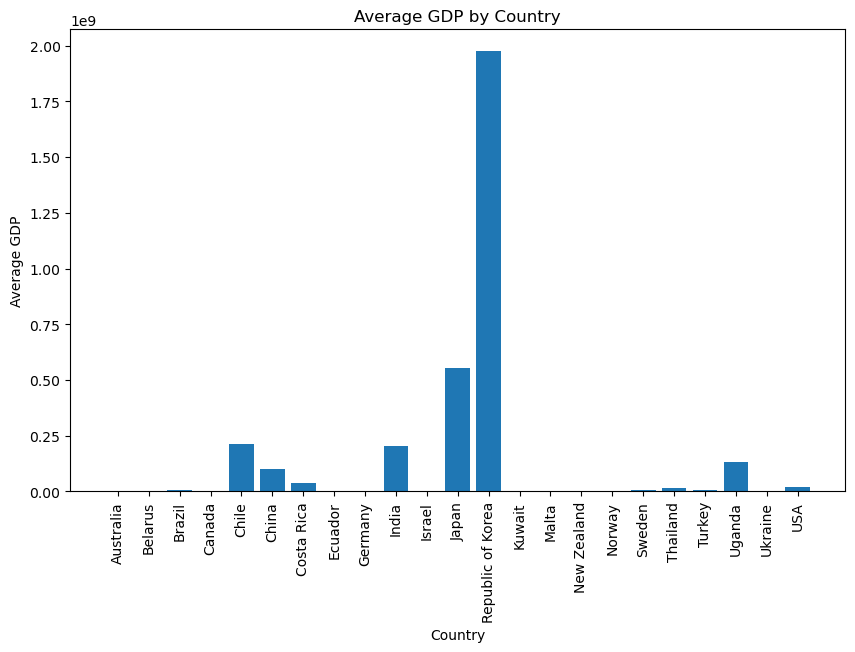

In [60]:
# List of countries you want to include in the bar chart
selected_countries = ["USA", "China", "Belarus", "Turkey", "Canada", "Chile","Columbia", "Costa Rica", 
"Ecuador", "Germany", "India", "Australia", "Israel", "Japan", 
"Republic of Korea", "Kuwait", "Malta", "New Zealand", 
"Norway", "Sweden", "Brazil", "Thailand", "Turkey", "Uganda", "Ukraine"]

# Filter the GDP data to include only the selected countries
selected_GDP_data = GDP_data[GDP_data["Country"].isin(selected_countries)]



plt.figure(figsize=(10, 6))
plt.bar(selected_GDP_data["Country"], selected_GDP_data["Average GDP"])
plt.xlabel("Country")
plt.ylabel("Average GDP")
plt.title("Average GDP by Country")
plt.xticks(rotation=90)
plt.show()


In [9]:
lung_data.head()

,Country,Sex,Year,ASR (World),Crude rate,Cumulative risk,Total
0,Belarus,Male,2000,59.877021,75.817569,8.360745,3484
1,Belarus,Male,2001,59.234048,74.673718,8.204052,3416
2,Belarus,Male,2002,57.087689,72.084418,7.935269,3278
3,Belarus,Male,2003,58.440589,73.686095,8.178290,3310
4,Belarus,Male,2004,58.032474,72.485494,8.145855,3230


In [10]:
melanoma_data.head()

,Country,Sex,Year,ASR (World),Crude rate,Cumulative risk,Total
0,Belarus,Male,2000,2.569562,3.177200,0.330698,146
1,Belarus,Male,2001,2.582797,3.300858,0.320393,151
2,Belarus,Male,2002,2.609352,3.320545,0.319802,151
3,Belarus,Male,2003,2.699419,3.316987,0.324824,149
4,Belarus,Male,2004,3.623803,4.510707,0.424321,201


In [53]:
# Merge all the dataframes

# particle_years = list(particle_data["Year"].unique())
# lung_years = list(lung_data["Year"].unique())
# overlap_years = list(set(lung_years) & set(particle_years))
# overlap_years.sort()

lung_pollution_data = lung_data.merge(particle_data, how='left', on=['Country', 'Year']).dropna()
melanoma_pollution_data = melanoma_data.merge(particle_data, how='left', on=['Country', 'Year']).dropna()

lung_full_data = lung_pollution_data.merge(GDP_data, how='left', on='Country').dropna()
melanoma_full_data = melanoma_pollution_data.merge(GDP_data, how='left', on='Country').dropna()

lung_full_data.tail()

,Country,Sex,Year,ASR (World),Crude rate,Cumulative risk,Total,Area Type,Average Weighted Concentration,Low Concetration,High Concentration,2017,2018,2019,2020,2021,2022,Average GDP
915,USA,Female,2016,19.326672,32.29181,2.978893,6203,Rural,6.58,6.48,6.69,"19,477,336.50","20,533,057.50","21,380,976.00","21,060,474.30","23,315,081.30","25,462,722.30",21871607.98
916,USA,Female,2016,19.326672,32.29181,2.978893,6203,Towns,7.36,7.24,7.45,"19,477,336.50","20,533,057.50","21,380,976.00","21,060,474.30","23,315,081.30","25,462,722.30",21871607.98
917,USA,Female,2016,19.326672,32.29181,2.978893,6203,Total,7.54,7.44,7.63,"19,477,336.50","20,533,057.50","21,380,976.00","21,060,474.30","23,315,081.30","25,462,722.30",21871607.98
918,USA,Female,2016,19.326672,32.29181,2.978893,6203,Urban,7.84,7.73,7.94,"19,477,336.50","20,533,057.50","21,380,976.00","21,060,474.30","23,315,081.30","25,462,722.30",21871607.98
919,USA,Female,2016,19.326672,32.29181,2.978893,6203,Cities,8.09,7.96,8.20,"19,477,336.50","20,533,057.50","21,380,976.00","21,060,474.30","23,315,081.30","25,462,722.30",21871607.98


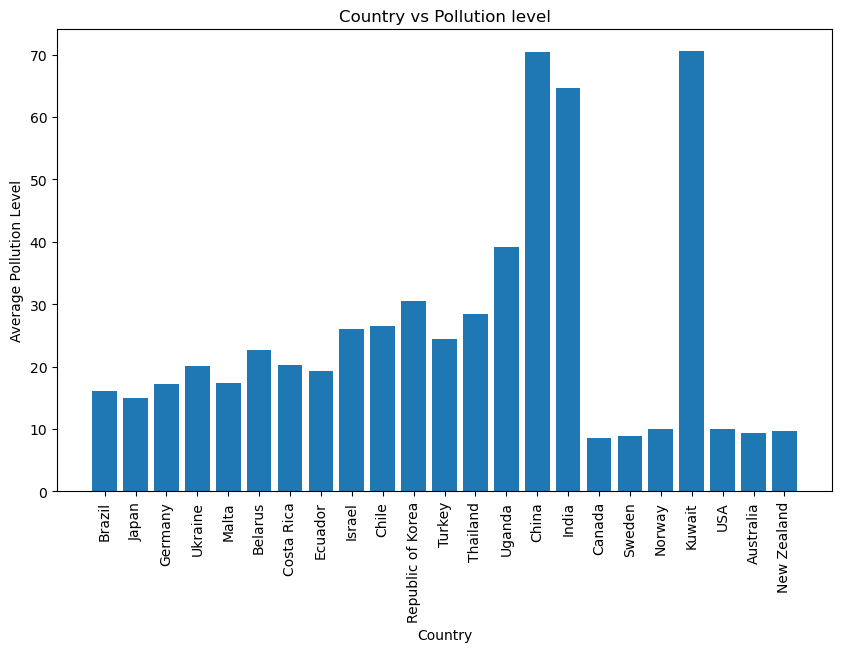

In [61]:

# Filter the particle data to include only the selected countries
selected_particle_data = particle_data[particle_data["Country"].isin(selected_countries)]

# find the countries with the highest polution indices

plt.figure(figsize=(10, 6))
plt.bar(selected_particle_data["Country"], selected_particle_data["Average Weighted Concentration"])
plt.xlabel("Country")
plt.ylabel("Average Pollution Level")
plt.title("Country vs Pollution level")
plt.xticks(rotation=90)
plt.show()

#create a bar chart


In [55]:
# create a scatter plot with and GDP (Y) and pollution level (X)
# plt.figure(figsize=(10, 6))
#plt.scatter(selected_GDP_data["Average GDP"], selected_particle_data["Average Weighted Concentration"])
#plt.xlabel("Country")
#plt.ylabel("Average Pollution Level")
#plt.title("Country vs Pollution level")
#plt.xticks(rotation=90)
#plt.show()

# run a regression line

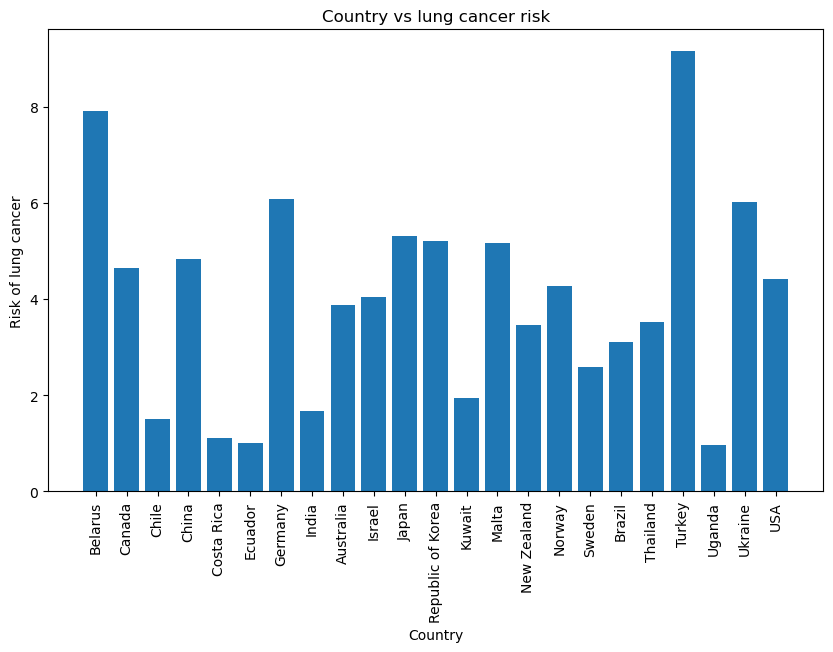

In [65]:
# Filter the GDP data to include only the selected countries
selected_lung_data = lung_full_data[lung_full_data["Country"].isin(selected_countries)]


# Find the number of lung cancer victims for our Countries sample

plt.figure(figsize=(10, 6))
plt.bar(selected_lung_data["Country"], selected_lung_data["Cumulative risk"])
plt.xlabel("Country")
plt.ylabel("Risk of lung cancer")
plt.title("Country vs lung cancer risk")
plt.xticks(rotation=90)
plt.show()

# run a regression line
# Creat a bar chart that reflects number lung cancer victims per country and their GDP and pollution level

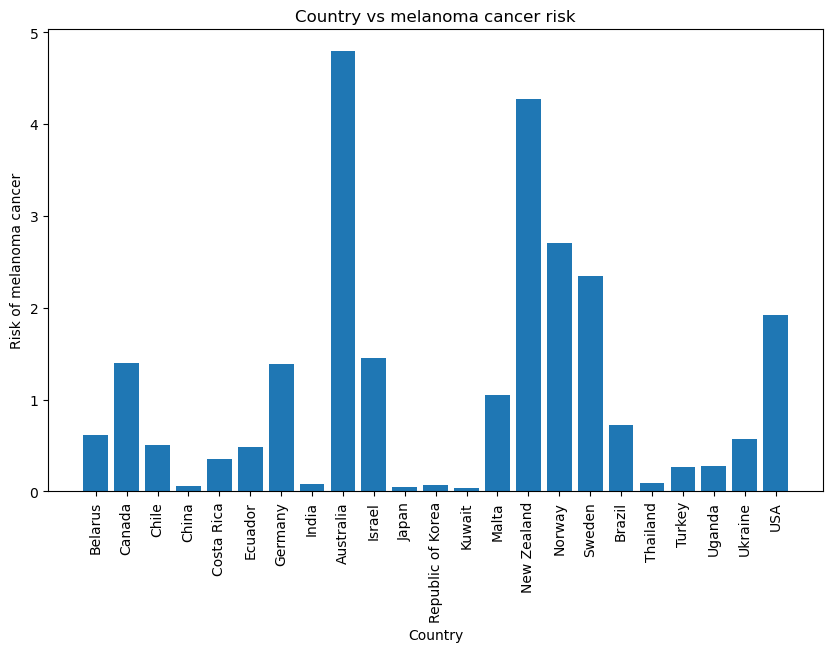

In [67]:
# Find the number of melanoma cancer victims for our Countries sample
# Filter the GDP data to include only the selected countries
selected_melanoma_data = melanoma_full_data[melanoma_full_data["Country"].isin(selected_countries)]


# Find the number of lung cancer victims for our Countries sample

plt.figure(figsize=(10, 6))
plt.bar(selected_melanoma_data["Country"], selected_melanoma_data["Cumulative risk"])
plt.xlabel("Country")
plt.ylabel("Risk of melanoma cancer")
plt.title("Country vs melanoma cancer risk")
plt.xticks(rotation=90)
plt.show()

# run a regression line
# Creat a bar chart that reflects number lung cancer victims per country and their GDP and pollution level
# Creat a bar chart

# Creat a bar chart that reflects number of melanoma victims per country and their GDP and pollution level
